# to download population info

In [23]:
from census import Census
import pickle
import pandas as pd
from os.path import exists
graph_obj_path = 'graph_checkpoints/nyc_metro/checkpoint_12.pkl'
pop_file_path = 'data/nyc_metro/population.pkl'
with open(graph_obj_path, 'rb') as f:
    ct = pickle.load(f)

ModuleNotFoundError: No module named 'census'

In [ ]:
ct.is_normalized_edge_mat

In [6]:
ct.edge_mat

NameError: name 'ct' is not defined

In [4]:
with open('../api_keys/census_key.txt', 'r') as f:
    key = f.readline()
c = Census(key)

# normalize by population of area
def geoid_to_cty_fps(geoid):
    if len(geoid) != 11:
        print('GEOID not correct length.')
        return
    countyfps = geoid[2:5]
    return countyfps

def geoid_to_st_fps(geoid):
    if len(geoid) != 11:
        print('GEOID not correct length.')
        return
    statefps = geoid[0:2]
    return statefps

def geoid_to_tract_fps(geoid):
    if len(geoid) != 11:
        print('GEOID not correct length.')
        return
    trfps = geoid[5:]
    return trfps


def get_population(statefps, countyfps, var='B01001_001E', varname='total_pop'):
    
    census = c.acs5.state_county_tract(fields = var,
                                        state_fips = statefps,
                                        county_fips = countyfps,
                                        tract = '*',
                                        year = 2020)
    df = pd.DataFrame(census)
    df.rename(columns={var: varname}, inplace=True)
    return df

def get_population_for_tract(statefps, countyfps, tract, var='B01001_001E', varname='total_pop'):
    
    census = c.acs5.state_county_tract(fields = var,
                                        state_fips = statefps,
                                        county_fips = countyfps,
                                        tract = tract,
                                        year = 2020)
    df = pd.DataFrame(census)
    df.rename(columns={var: varname}, inplace=True)
    return df

In [5]:
# ct = CensusTractMobility(tract_data_dir='Tracts/nyc_metro_boundaries/nyc_metro_boundaries.shp')
# checkpoint_version = -1
# checkpoint_path = f'safegraph/compute_graph_checkpoints/denver/checkpoint_{checkpoint_version}.pkl'
# # with open(checkpoint_path, 'rb') as f:
# #     ct = pickle.load(f)

# get population of each tract
df = pd.DataFrame()
pop_file_path = 'data/nyc_metro/population.pkl'
if not exists(pop_file_path):
    df['state_fips'] = ct.tract_data.GEOID.apply(geoid_to_st_fps)
    df['county_fips'] = ct.tract_data.GEOID.apply(geoid_to_cty_fps)
    df.drop_duplicates(inplace=True)

    pop = pd.DataFrame()
    for i in range(0, df.shape[0]):
        x = df.iloc[i]
        pop = pd.concat([pop, get_population(x['state_fips'], x['county_fips'])])

    pop['GEOID'] = pop['state'] + pop['county'] + pop['tract']
    pop_dict = dict(zip(pop['GEOID'], pop['total_pop']))

    f = open(pop_file_path, 'wb')
    pickle.dump(pop_dict, f)
    f.close()
else:
    with open(pop_file_path, 'rb') as f:
        pop_dict = pickle.load(f)

In [6]:
len(pop_dict.keys())

8231

In [7]:
all_geoids = list(ct.idx_node_map.values())
print(f'Num geoids in the graph: {len(all_geoids)}')

missed = []
[(missed.append(i) if i not in pop_dict.keys() else None) for i in all_geoids]

print(f'Num geoids that are not in the pop dict: {len(missed)}')

Num geoids in the graph: 8231
Num geoids that are not in the pop dict: 0


In [8]:
# check if any are not strings
any([not isinstance(s, str) for s in missed])

False

In [9]:
any([i in pop_dict.keys() for i in missed])

False

In [10]:
missed

[]

In [11]:
# missed_df = ct.tract_data.loc[ct.tract_data.GEOID.isin(missed)]

# missed_df['state_fips'] = missed_df.GEOID.apply(geoid_to_st_fps)
# missed_df['county_fips'] = missed_df.GEOID.apply(geoid_to_cty_fps)
# missed_df['tract_fips'] = missed_df.GEOID.apply(geoid_to_tract_fps)
# df = missed_df

# pop = pd.DataFrame()
# for i in range(0, missed_df.shape[0]):
#     x = missed_df.iloc[i]
#     pop = pd.concat([pop, get_population_for_tract(x['state_fips'], x['county_fips'], x['tract_fips'])])

# # pop['GEOID'] = pop['state'] + pop['county'] + pop['tract']
# # pop_dict2 = dict(zip(pop['GEOID'], pop['total_pop']))

# # pop_dict = pop_dict | pop_dict3

# # f = open(pop_file_path, 'wb')
# # pickle.dump(pop_dict, f)
# # f.close()


In [12]:
# ct.check_and_normalize_edges(pop_dict)

In [13]:
_ = [print(k) if v == 0 else None for k, v in pop_dict.items()]

09003980001
09003980002
09003980003
09009990000
09001990000
42017980000
42003980000
42003980100
42003980300
42003980400
42003980700
42003980800
42003981000
42003981100
42003981200
36047011902
36047017500
36047017700
36047031402
36047035702
36047040700
36047044902
36047054300
36047057902
36047058902
36047066600
36047070203
36047070602
36047096000
36047001802
36047001803
36047001804
36047003102
36047102802
36047103402
36047107002
36047107003
36047005303
36047008600
36047118000
36047990100
36119005600
36061031100
36061031900
36061000100
36061000500
36061008602
36059990100
36059990200
36059990301
36059990302
36059990400
36029990000
36005001903
36005001904
36005002400
36005006302
36005011000
36005011702
36005016300
36005017100
36005024900
36005043502
36005043503
36005048402
36005050400
36005051602
36013990000
36085015400
36085022802
36085990100
36085005902
36085009702
36103990100
36081017101
36081019902
36081019903
36081021603
36081021900
36081022900
36081024600
36081028803
36081029900
3608

In [14]:
pop_dict['09003980001']

0.0

Replace 0 population with population of 1.

In [15]:
df = pd.DataFrame.from_dict(pop_dict, orient='index').reset_index()
df.loc[df[0] <= 0, 0] = 1

In [16]:
df.head()

,index,0
0,09003330100,1883.0
1,09003400101,3093.0
2,09003400102,4307.0
3,09003400200,6289.0
4,09003400300,6771.0


In [17]:
pop_dict = dict(zip(df['index'], df[0]))

In [18]:
ct.check_and_normalize_edges(pop_dict)

In [19]:
ct.is_normalized_edge_mat

True

In [20]:
ct.save_pickle('graph_checkpoints/nyc_metro/checkpoint_norm.pkl')

# EDA 

In [9]:
import numpy as np

graph_obj_path = 'graph_checkpoints/nyc_metro/checkpoint_norm.pkl'
with open(graph_obj_path, 'rb') as f:
    ct = pickle.load(f)

In [14]:
import seaborn as sns

In [15]:
raw = ct.edge_mat

In [22]:
np.where(~raw.any(axis=1))[0]

array([   9,   10,   11, ..., 8054, 8055, 8056])

In [19]:
(raw[:]a == 0).shape

(8231, 8231)

In [16]:
raw[raw[:] == 0]

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
raw = pd.DataFrame(raw)
# raw = raw[raw != 0]

In [46]:
raw

,0,1,2,3,4,5,6,7,8,9,...,8221,8222,8223,8224,8225,8226,8227,8228,8229,8230
0,1.564571,0.299065,0.319881,0.024002,0.036958,0.040994,0.052251,0.005098,0.002549,0.0,...,0.0,0.0,0.000000,0.000000,0.000850,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.031875,0.723573,0.378894,0.016207,0.019089,0.061948,0.051144,0.004322,0.000720,0.0,...,0.0,0.0,0.000000,0.000000,0.000720,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.060859,0.451438,1.257816,0.125677,0.013547,0.048562,0.136932,0.012505,0.012297,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.378613,0.529865,1.434489,0.406872,0.034040,0.214515,0.223507,0.005138,0.010276,0.0,...,0.0,0.0,0.000000,0.000000,0.001285,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.749011,0.163610,0.412082,0.043869,0.182309,0.264293,0.071197,0.001438,0.007911,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.073226,0.079423,1.250537,0.000506,0.000506,0.002024,0.001012
8227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.195096,0.000000,0.053305,0.000000,0.906983,0.646055,0.140192,0.684701
8228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.050678,0.000000,0.015508,0.001108,0.187206,1.541955,0.217391,0.164220
8229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.251892,0.000606,0.024826,0.000000,0.081290,0.551317,1.236906,1.110506


In [39]:
raw.describe()

,0,1,2,3,4,5,6,7,8,9,...,8221,8222,8223,8224,8225,8226,8227,8228,8229,8230
count,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.0,...,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000
mean,0.002470,0.000922,0.001616,0.000199,0.000163,0.000392,0.000331,0.000380,0.000431,0.0,...,0.001005,0.000771,0.000885,0.007317,0.019917,0.000783,0.000997,0.006127,0.002364,0.002607
std,0.042169,0.015731,0.029335,0.005112,0.002871,0.008561,0.006227,0.006248,0.013510,0.0,...,0.016043,0.012881,0.017666,0.447115,0.349350,0.021428,0.017359,0.267353,0.053956,0.057389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.002520,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.010676,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.669614,0.723573,1.434489,0.406872,0.182309,0.460240,0.406322,0.464138,1.002282,0.0,...,0.771352,0.667622,0.983041,40.000000,22.000000,1.259725,0.906983,24.000000,4.000000,3.194309


In [8]:
vals = pd.Series(raw.values.flatten().tolist())

In [9]:
len(vals)

67749361

In [65]:
vals.mean()

0.007078242280711394

In [66]:
vals.mode()

0    0.0
dtype: float64

In [67]:
vals.median()

0.0

In [68]:
vals.describe()

count    6.774936e+07
mean     7.078242e-03
std      2.064779e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.611000e+03
dtype: float64

In [14]:
vals.isna().sum()

0

<AxesSubplot: ylabel='Count'>

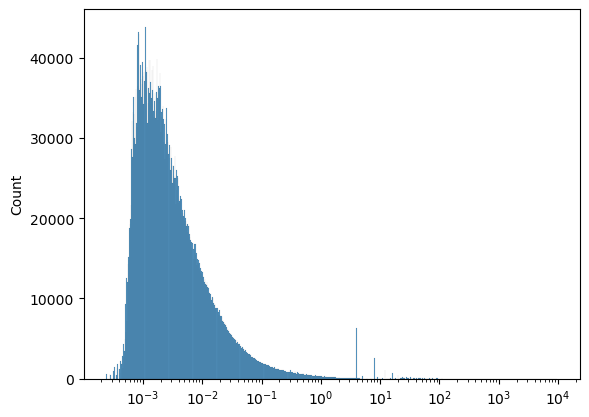

In [16]:
sns.histplot(vals[vals>0], log_scale=True)

In [21]:
q99 = vals[vals>0].quantile(0.99)

In [22]:
vals[vals>q99]

0           1.564571
130         0.512744
695         0.494265
8231        1.031875
8232        0.723573
              ...   
67748728    0.407070
67749353    0.814807
67749358    0.625167
67749359    1.476212
67749360    3.194309
Length: 49391, dtype: float64

In [51]:
1/q99*1000

2587.4325547949566

In [47]:
np.isinf(raw).sum().sum()

0

In [48]:
rec = 1/raw*1000
rec

,0,1,2,3,4,5,6,7,8,9,...,8221,8222,8223,8224,8225,8226,8227,8228,8229,8230
0,639.152865,3343.750000,3126.162019,4.166372e+04,2.705747e+04,2.439378e+04,1.913821e+04,1.961667e+05,3.923333e+05,inf,...,inf,inf,inf,inf,1.177000e+06,inf,inf,inf,inf,inf
1,969.109948,1382.030861,2639.258555,6.170000e+04,5.238679e+04,1.614244e+04,1.955282e+04,2.313750e+05,1.388250e+06,inf,...,inf,inf,inf,inf,1.388250e+06,inf,inf,inf,inf,inf
2,942.632613,2215.143121,795.028998,7.956882e+03,7.381538e+04,2.059227e+04,7.302892e+03,7.996667e+04,8.132203e+04,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
3,725.366876,1887.272727,697.112156,2.457774e+03,2.937736e+04,4.661677e+03,4.474138e+03,1.946250e+05,9.731250e+04,inf,...,inf,inf,inf,inf,7.785000e+05,inf,inf,inf,inf,inf
4,1335.093615,6112.087912,2426.701571,2.279508e+04,5.485207e+03,3.783673e+03,1.404545e+04,6.952500e+05,1.264091e+05,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8226,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,1.365630e+04,1.259076e+04,7.996561e+02,1.976750e+06,1.976750e+06,4.941875e+05,9.883750e+05
8227,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,5.125683e+03,inf,1.876000e+04,inf,1.102557e+03,1.547855e+03,7.133080e+03,1.460490e+03
8228,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,1.973224e+04,inf,6.448214e+04,9.027500e+05,5.341716e+03,6.485273e+02,4.600000e+03,6.089376e+03
8229,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,3.969952e+03,1.651500e+06,4.028049e+04,inf,1.230168e+04,1.813839e+03,8.084690e+02,9.004907e+02


In [ ]:
raw

In [42]:
# interpolate 0s with 1 to avoid infinities/nans
# raw = raw.replace(0, 1)

In [50]:
raw = raw.replace([np.inf, -np.inf, np.nan], 0) 

<AxesSubplot: ylabel='Count'>

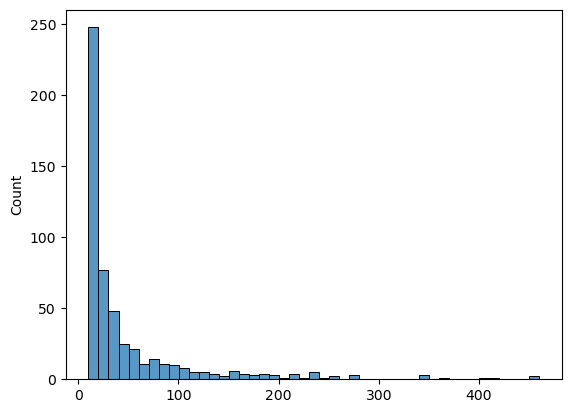

In [94]:
sns.histplot(raw[(raw<500) & (raw > 10)], binwidth=10)

In [84]:
all_values = normalized.flatten()
mean_values_per_tract = normalized.mean(axis=1)

In [49]:
all_values

array([1.56457094, 0.29906542, 0.31988105, ..., 0.62516674, 1.47621165,
       3.19430858])

<AxesSubplot: ylabel='Count'>

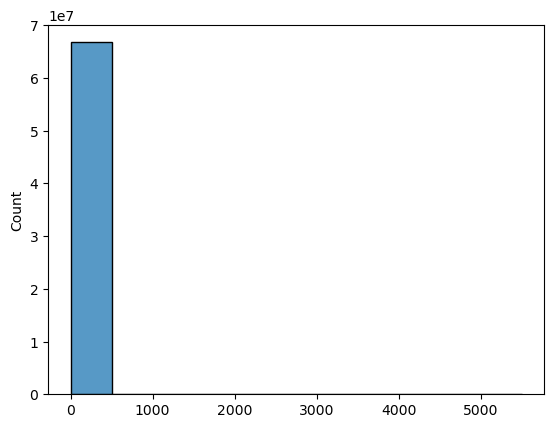

In [55]:
sns.histplot(all_values, binwidth=500)

In [ ]:
sns.histplot(mean_values_per_tract, binwidth=500)